# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Monopoly game described in the Homework and for which you wrote a Markov chain model:

<img src="monopoly.png" width="300px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* The jail does not prevent the player from continuing to play. In other words, when landing on the “GO TO JAIL” cell, the player jumps back to the “JAIL” cell, but resumes play immediately.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`.

**Note 2**: Make sure to print the result in the end.

---

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
states = ["go", "vermont", "jail", "virginia", "parking", "marvin", "gotojail", "pennsylvania"]
P = np.array([[0  , 1/6  , 1/6  , 1/6  , 1/6  , 1/6  , 1/6  , 0  ], [ 0  , 0  , 1/6  , 1/6  , 1/6  , 1/6  , 1/6  , 1/6  ], [ 1/6  , 0  , 0  , 1/6  , 1/6  , 1/6  , 1/6  , 1/6  ], [ 1/6  , 1/6  , 0  , 0  , 1/6  , 1/6  , 1/6  , 1/6  ], [ 1/6  , 1/6  , 1/6  , 0  , 0  , 1/6  , 1/6  , 1/6  ], [ 1/6  , 1/6  , 1/6  , 1/6  , 0  , 0  , 1/6  , 1/6  ], [ 0 , 0 , 1  , 0  , 0  , 0  , 0  , 0  ], [ 1/6 , 1/6  , 1/6  , 1/6  , 1/6  , 1/6  , 0  , 0]])

print(states)
print(P)

['go', 'vermont', 'jail', 'virginia', 'parking', 'marvin', 'gotojail', 'pennsylvania']
[[ 0.          0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
   0.16666667  0.        ]
 [ 0.          0.          0.16666667  0.16666667  0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.          0.          0.16666667  0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.          0.          0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.          0.          0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.          0.
   0.16666667  0.16666667]
 [ 0.          0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
   0.          0.        ]]


---

#### Activity 2.

Compute the probability of the following trajectories:

* "COLLECT \$200" - "VERMONT AVENUE" - "GO TO JAIL" - "JAIL"
* "COLLECT \$200" - "GO TO JAIL" - "JAIL" - "COLLECT \$200"
* "COLLECT \$200" - "PENNSYLVANIA AVENUE" - "COLLECT \$200"

**Note:** Make sure to print the result in the end.

---

In [2]:
# P(INITIAL STATE = COLLECT 200) * P(VERMONT|COLLECT 200) * P(GOTOJAIL|VERMONT) * P(JAIL|GOTOJAIL)
p1= 1*P[0,1]*P[1,6]*P[6,2]
print(p1)

# P(INITIAL STATE = COLLECT 200) * P(GOTOJAIL|COLLECT 200) * P(JAIL|GOTOJAIL) * P(COLLECT 200 | JAIL)
p2= 1*P[0,6]*P[6,2]*P[2,0]
print(p2)

# P(INITIAL STATE = COLLECT 200) * P(PENNSYLVANIA|COLLECT 200) * P(COLLECT 200|PENNSYLVANIA)
p3= 1*P[0,7]*P[7,0]
print(p3)

0.0277777777778
0.0277777777778
0.0


### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

Irreducible: the chain is not irredicible because there are states that are unreachable from some other state in some given time t. For example: the state COLLECT $200 is unreachable from state GO TO JAIL.

Aperiodic: all states are reachable to themselves after 2 turns but also after 3 turns (and more). Therefore, the gcd(P^t(x|x)) > 0 for every positive integer t -> is 1. So we conclude every state is aperiodic and therefore the chain is aperodic too

Ergodic: the chain is irreducible and aperiodic, therefore it is ergodic.


---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [3]:
#w, v = np.linalg.eig(P.T)
#u = v[:, 0]

eigvals, eigvecs, _ = scipy.linalg.eig(P, left=True)  
result = eigvecs[:, np.isclose(eigvals, 1)]
theor_distr = np.real(result / sum(result))
print(theor_distr)

[[ 0.11131135]
 [ 0.09350154]
 [ 0.21817025]
 [ 0.10940316]
 [ 0.1068589 ]
 [ 0.12466872]
 [ 0.12731899]
 [ 0.10876709]]


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [7]:
initial_state = 0
current_state = initial_state
trajectory = [0]
for i in range(100000):
    current_state = np.random.choice(len(states), p=P[current_state])
    trajectory.append(current_state)


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #4.

**Note**: Don't forget to load `matplotlib`.

---

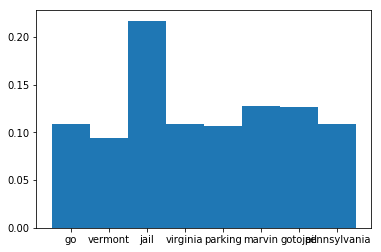

In [8]:
bins_arr = np.arange(-0.5, len(states)+0.5)
plt.figure()
plt.hist(trajectory,bins=bins_arr, normed=1, align='mid')  
plt.xticks(range(len(states)),states)
plt.show()

The empirical distribution matches the theoretical distribution.